In [1]:
import tensorflow.keras as keras
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
model_path = 'my_transferlearning_model.h5'
new_model = keras.models.load_model(model_path)

new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

## preprare batch for testing

In [59]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(0.2),
    #keras.layers.Rescaling(1./255),
])

In [60]:
cat_dog = []
cat_dog_raw = ['cat1.jpeg','cat2.jpeg','dog1.jpeg','dog2.jpeg']
for i in cat_dog_raw :
    a = cv2.imread(i)
    a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    a = cv2.resize(a, (160, 160))
    
    for i in range(8):
        a = data_augmentation(a)
        cat_dog.append(a)

print(len(cat_dog))


32


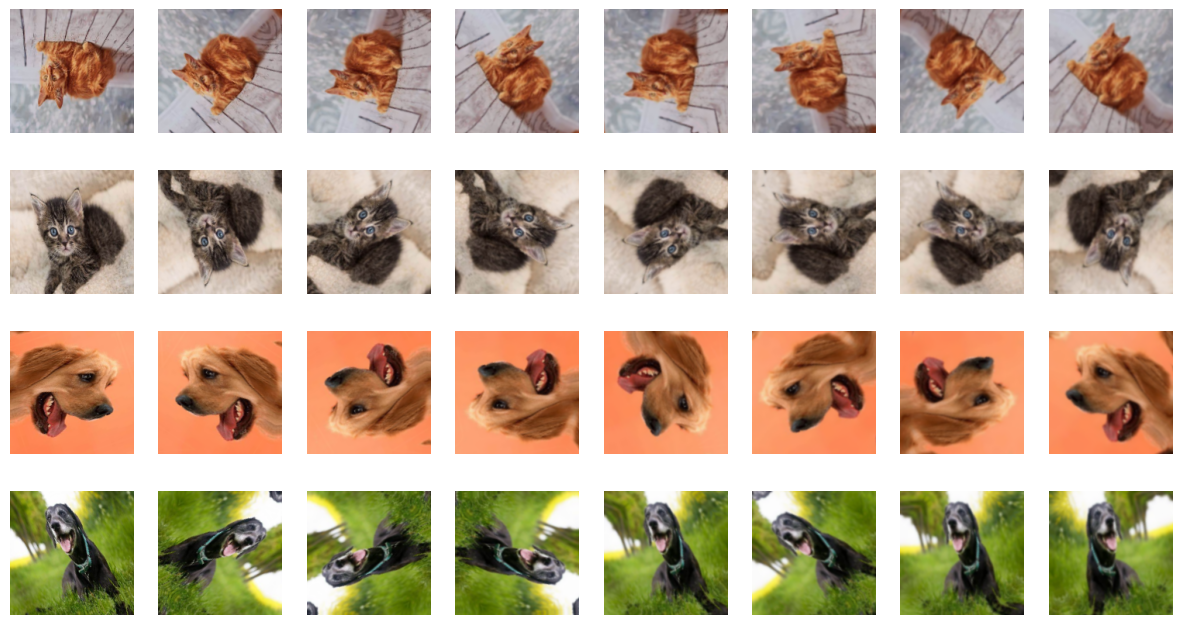

In [61]:
plt.figure(figsize=(15,8))
b=1
for i in cat_dog :
    ax = plt.subplot(4,8,b)
    plt.imshow(i/255.0)
    plt.axis(False)
    b = b+1
plt.show()

## test

In [62]:
new_model.trainable =False

In [116]:
def predict_cat_or_dog(z):
    z = new_model.predict_step(np.expand_dims(z,(0,)))

    pred = keras.activations.sigmoid(z)
    #print(pred[0][0])
    if pred < 0.5 :
        return 'cat'
    else :
        return 'dog'


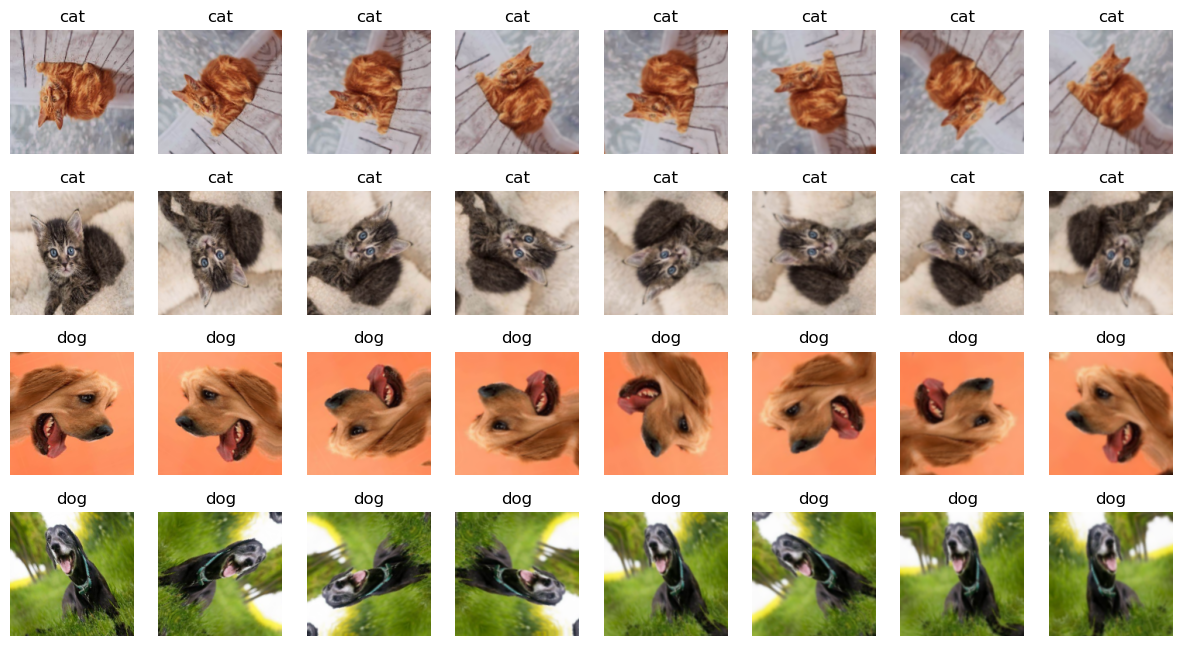

In [117]:
plt.figure(figsize=(15,8))
b=1
pred_title = [predict_cat_or_dog(i) for i in cat_dog]
for i in range(32) :
    ax = plt.subplot(4,8,b)
    plt.imshow(cat_dog[i]/255.0)
    plt.title(pred_title[i])
    plt.axis(False)
    b = b+1
plt.show()

# Done